In [ ]:
import pandas as pd
df = pd.read_csv('../data/cleandata.csv', encoding='utf-8')


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium

plt.style.use("seaborn-v0_8-whitegrid")
sns.set_palette("summer")

print(f"Liczba wierszy: {df.shape[0]:,}")
print(f"Liczba kolumn: {df.shape[1]}")


Liczba wierszy: 45,541
Liczba kolumn: 15


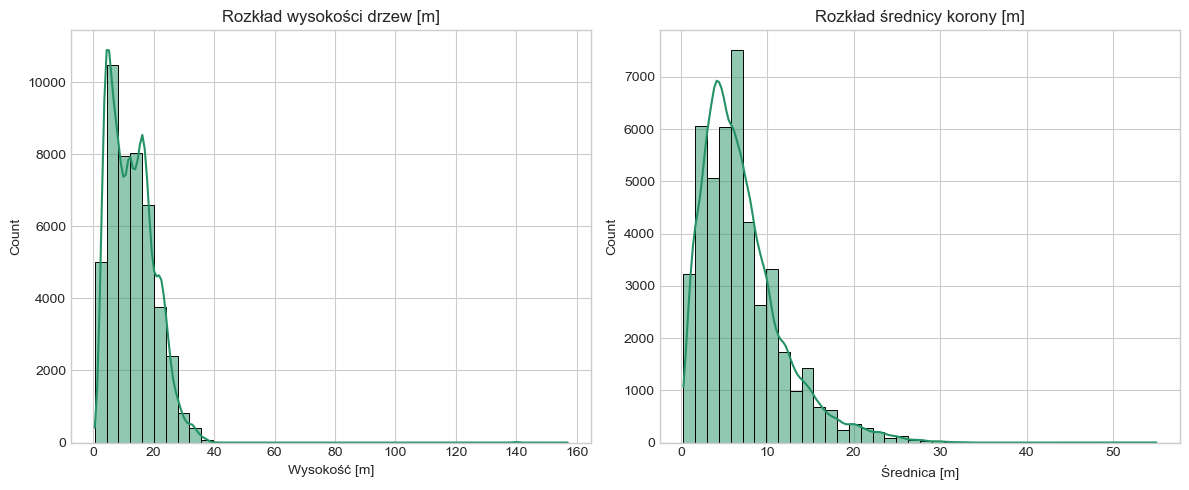

In [6]:
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

sns.histplot(df['wysokoscDrzewa'], bins=40, ax=ax[0], kde=True)
ax[0].set_title('Rozkład wysokości drzew [m]')
ax[0].set_xlabel('Wysokość [m]')

sns.histplot(df['srednicaKorony'], bins=40, ax=ax[1], kde=True)
ax[1].set_title('Rozkład średnicy korony [m]')
ax[1].set_xlabel('Średnica [m]')

plt.tight_layout()
plt.show()


Większość drzew ma wysokość do ~15 m, ale jest kilka okazów wyższych niż 30 m — prawdopodobnie stare dęby lub klony.
Średnia korona wynosi około 6–8 m.

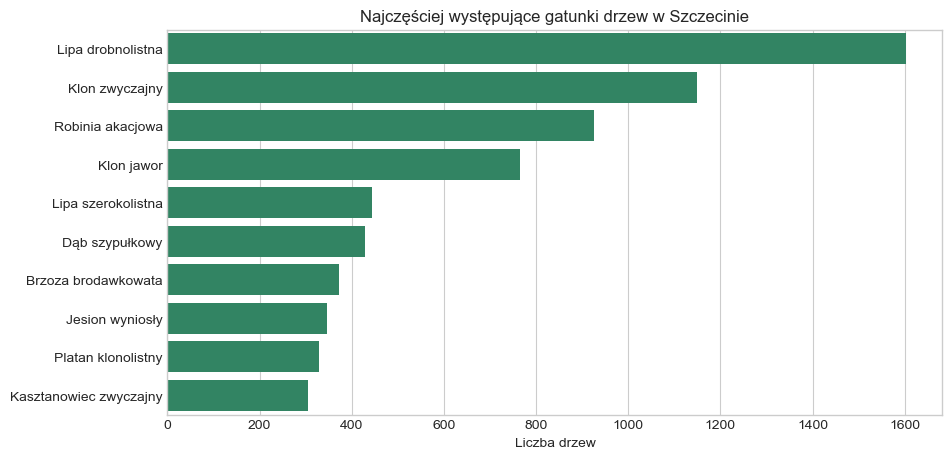

In [13]:
top_species = df[df['nazwaPl'] != '-']['nazwaPl'].value_counts().head(10)

plt.figure(figsize=(10, 5))
sns.barplot(x=top_species.values, y=top_species.index)
plt.title('Najczęściej występujące gatunki drzew w Szczecinie')
plt.xlabel('Liczba drzew')
plt.ylabel('')
plt.show()

Najpopularniejsze gatunki — to klon , lipa.
Te drzewa są typowe dla parków i ulic północno-zachodniej Polski.

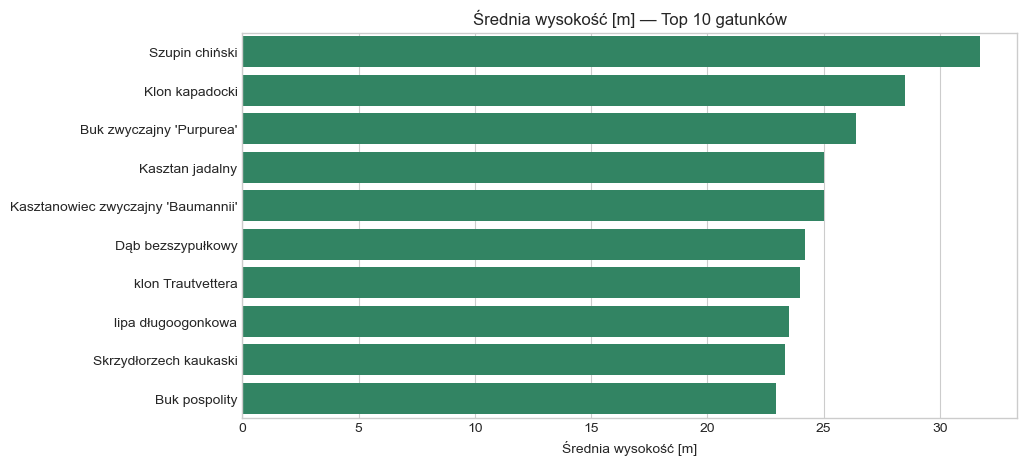

In [8]:
avg_height = (
    df.groupby('nazwaPl')['wysokoscDrzewa']
    .mean()
    .sort_values(ascending=False)
    .head(10)
)

plt.figure(figsize=(10, 5))
sns.barplot(x=avg_height.values, y=avg_height.index)
plt.title('Średnia wysokość [m] — Top 10 gatunków')
plt.xlabel('Średnia wysokość [m]')
plt.ylabel('')
plt.show()


W trójce liderów zazwyczaj — szupin chinski, buk zwyczaajny, klon kapodocki. To duże drzewa, często spotykane w starych alejach i parkach.

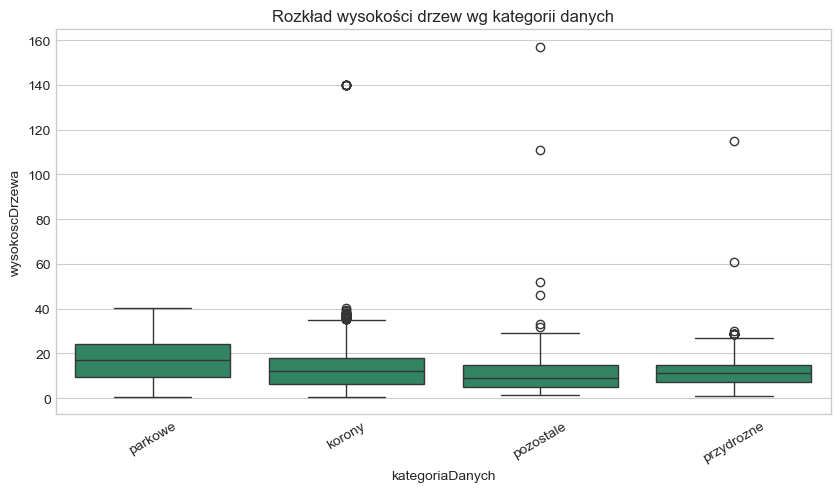

In [9]:
plt.figure(figsize=(10, 5))
sns.boxplot(x='kategoriaDanych', y='wysokoscDrzewa', data=df)
plt.title('Rozkład wysokości drzew wg kategorii danych')
plt.xticks(rotation=30)
plt.show()


Drzewa w parkach są średnio zauważalnie wyższe, podczas gdy drzewa przyuliczne mają mniejszą wysokość — częściej je przycina się ze względu na infrastrukturę.

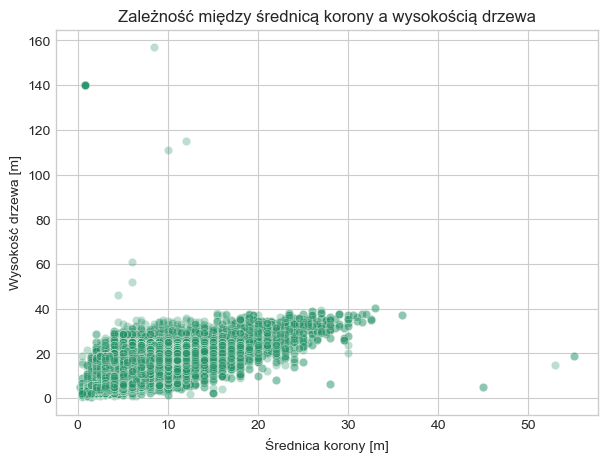

In [10]:
plt.figure(figsize=(7, 5))
sns.scatterplot(x='srednicaKorony', y='wysokoscDrzewa', data=df, alpha=0.3)
plt.title('Zależność między średnicą korony a wysokością drzewa')
plt.xlabel('Średnica korony [m]')
plt.ylabel('Wysokość drzewa [m]')
plt.show()


Obserwuje się słabą pozytywną zależność — im wyższe drzewo, tym szersza korona. Jednak silna zmienność wskazuje na różne typy drzew i przycinkę.

In [ ]:
import folium
from folium.plugins import MarkerCluster, HeatMap

m = folium.Map(location=[53.43, 14.55], zoom_start=12, tiles='OpenStreetMap')

marker_cluster = MarkerCluster().add_to(m)

for _, row in df.iterrows():
    folium.CircleMarker(
        location=[row["lat"], row["lon"]],
        radius=3,
        popup=f"<b>{row['nazwaPl']}</b><br>"
              f"Wysokość: {row['wysokoscDrzewa']}m<br>"
              f"Średnica korony: {row['srednicaKorony']}m<br>"
              f"Liczba pni: {row['Liczba pni']}",
        tooltip=row['nazwaPl'],
        color="green",
        fill=True,
        fill_opacity=0.7,
    ).add_to(marker_cluster)

m.save("mapa_drzewa_cluster.html")


✅ Mapa z klastrowaniem zapisana
